In [2]:
import pandas as pd
import numpy as np
import os

from sklearn.metrics import accuracy_score

import statsmodels.api as sm

from sklearn.cross_decomposition import PLSRegression

from sklearn.linear_model import Lars

import matplotlib.pyplot as plt

# Data Preprocessing

Data Description

In [3]:
data = pd.read_excel(r'ENROLLMENT_DATA_F21 (1).xlsx')

In [4]:
print(data.shape)
data.head()

(4644, 35)


,Target_Enroll,avg_income,CAMPUS_VISIT,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,distance,ETHNICITY,hscrat,...,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS,Total,AllocProportion,SampleSize,ActualProportion,SelectionProb,SamplingWeight
0,0,NaN,0,EML,1,Sep,2012,NaN,NaN,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
1,0,NaN,0,SAT,12,Feb,2014,NaN,N,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
2,0,NaN,0,C01,16,Jan,2015,NaN,C,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
3,0,NaN,0,EML,11,Mar,2015,NaN,NaN,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
4,0,NaN,0,TFL,28,Mar,2015,NaN,B,0.037652,...,NaN,N,2,0,2580,0.5,2322,0.5,0.9,1.111111


In [5]:
data.columns

Index(['Target_Enroll', 'avg_income', 'CAMPUS_VISIT', 'CONTACT_CODE1',
       'Contact_Date', 'Contact_Month', 'Contact_Year', 'distance',
       'ETHNICITY', 'hscrat', 'ID', 'init_span', 'Instate', 'int1rat',
       'int2rat', 'interest', 'IRSCHOOL', 'LEVEL_YEAR', 'mailq', 'premiere',
       'REFERRAL_CNTCTS', 'satscore', 'SELF_INIT_CNTCTS', 'sex',
       'SOLICITED_CNTCTS', 'telecq', 'TERRITORY', 'TOTAL_CONTACTS',
       'TRAVEL_INIT_CNTCTS', 'Total', 'AllocProportion', 'SampleSize',
       'ActualProportion', 'SelectionProb', 'SamplingWeight'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Target_Enroll       4644 non-null   int64  
 1   avg_income          3961 non-null   float64
 2   CAMPUS_VISIT        4644 non-null   int64  
 3   CONTACT_CODE1       4639 non-null   object 
 4   Contact_Date        4644 non-null   int64  
 5   Contact_Month       4644 non-null   object 
 6   Contact_Year        4644 non-null   int64  
 7   distance            4042 non-null   float64
 8   ETHNICITY           4107 non-null   object 
 9   hscrat              4644 non-null   float64
 10  ID                  4644 non-null   int64  
 11  init_span           4644 non-null   int64  
 12  Instate             4644 non-null   object 
 13  int1rat             4644 non-null   float64
 14  int2rat             4644 non-null   float64
 15  interest            4644 non-null   int64  
 16  IRSCHO

Data Cleaning

In [16]:
#remove nulls
data2 = data.dropna()

In [17]:
#split variables to viable inputs and target

X = data2.drop(['IRSCHOOL', 'ID', 'Target_Enroll'], axis=1)
Y = data2['Target_Enroll']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 127 to 4639
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_income          1526 non-null   float64
 1   CAMPUS_VISIT        1526 non-null   int64  
 2   CONTACT_CODE1       1526 non-null   object 
 3   Contact_Date        1526 non-null   int64  
 4   Contact_Month       1526 non-null   object 
 5   Contact_Year        1526 non-null   int64  
 6   distance            1526 non-null   float64
 7   ETHNICITY           1526 non-null   object 
 8   hscrat              1526 non-null   float64
 9   init_span           1526 non-null   int64  
 10  Instate             1526 non-null   object 
 11  int1rat             1526 non-null   float64
 12  int2rat             1526 non-null   float64
 13  interest            1526 non-null   int64  
 14  LEVEL_YEAR          1526 non-null   object 
 15  mailq               1526 non-null   int64  
 16  prem

In [19]:
#Remove all categorical variables

cat_columns = X.select_dtypes(['object']).columns
X2 = X.drop(cat_columns, axis=1)

In [20]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 127 to 4639
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_income          1526 non-null   float64
 1   CAMPUS_VISIT        1526 non-null   int64  
 2   Contact_Date        1526 non-null   int64  
 3   Contact_Year        1526 non-null   int64  
 4   distance            1526 non-null   float64
 5   hscrat              1526 non-null   float64
 6   init_span           1526 non-null   int64  
 7   int1rat             1526 non-null   float64
 8   int2rat             1526 non-null   float64
 9   interest            1526 non-null   int64  
 10  mailq               1526 non-null   int64  
 11  premiere            1526 non-null   int64  
 12  REFERRAL_CNTCTS     1526 non-null   int64  
 13  satscore            1526 non-null   float64
 14  SELF_INIT_CNTCTS    1526 non-null   int64  
 15  sex                 1526 non-null   float64
 16  SOLI

# PLS

In [22]:
plsr_model = PLSRegression()
plsr_model.fit(X2,Y)
prediction_pls = plsr_model.predict(X2)

plsr_model.coef_

array([[ 1.71842477e-02],
       [ 3.10331697e-02],
       [-3.03002251e-03],
       [ 1.81258889e-02],
       [ 1.83864385e-03],
       [ 4.22031907e-02],
       [-2.22593842e-02],
       [ 1.07702344e-02],
       [ 1.34864917e-02],
       [ 1.32940286e-02],
       [ 6.18752562e-03],
       [ 3.27451017e-02],
       [ 9.64861183e-03],
       [ 1.82907202e-02],
       [ 4.43581581e-02],
       [ 8.03174544e-03],
       [ 9.35519851e-04],
       [-5.94993194e-02],
       [ 3.68019076e-02],
       [-6.97731371e-03],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-3.37387217e-31],
       [ 1.46417069e-31]])

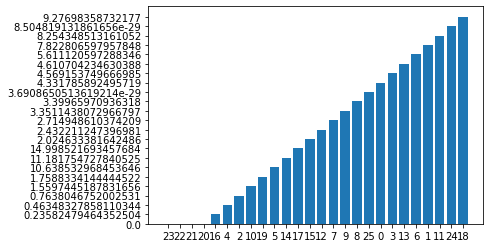

In [26]:
pls_coeff = np.ravel(plsr_model.coef_)
pls_coeff_idx = np.arange(len(pls_coeff)).reshape((len(pls_coeff),1))
pls_coeff_sum = np.sum(np.absolute(pls_coeff))
pls_coeff = np.absolute((pls_coeff/pls_coeff_sum) * 100).reshape((len(pls_coeff),1))
pls_coeff_colnames = np.array(list(X2.columns)).reshape((len(list(X2.columns))),1)

pls_coeff_X = np.concatenate((pls_coeff_idx, pls_coeff, pls_coeff_colnames), axis=1)
pls_coeff_X = pls_coeff_X[pls_coeff_X[:,1].argsort()]

fig=plt.figure()
plt.bar(pls_coeff_X[:,0], pls_coeff_X[:,1])
plt.show()

In [27]:
pls_coeff_X

array([['23', '0.0', 'ActualProportion'],
       ['22', '0.0', 'SampleSize'],
       ['21', '0.0', 'AllocProportion'],
       ['20', '0.0', 'Total'],
       ['16', '0.23582479464352504', 'SOLICITED_CNTCTS'],
       ['4', '0.46348327858110344', 'distance'],
       ['2', '0.7638046752002531', 'Contact_Date'],
       ['10', '1.5597445187831656', 'mailq'],
       ['19', '1.7588334144444522', 'TRAVEL_INIT_CNTCTS'],
       ['5', '10.638532968453646', 'hscrat'],
       ['14', '11.181754727840525', 'SELF_INIT_CNTCTS'],
       ['17', '14.998521693457684', 'telecq'],
       ['15', '2.024633381642486', 'sex'],
       ['12', '2.432211247396981', 'REFERRAL_CNTCTS'],
       ['7', '2.714948610374209', 'int1rat'],
       ['9', '3.3511438072966797', 'interest'],
       ['8', '3.39965970936318', 'int2rat'],
       ['25', '3.6908650513619214e-29', 'SamplingWeight'],
       ['0', '4.331785892495719', 'avg_income'],
       ['3', '4.569153749666985', 'Contact_Year'],
       ['13', '4.610704234630388', 'sats

# Logistic Regression w/ PLSR

In [44]:
#Using only variables that have a coefficient > 0 
X_pls = X2.drop(['ActualProportion', 'SampleSize', 'AllocProportion', 'Total'], axis=1)

logit_model = sm.Logit(Y,X_pls)
result=logit_model.fit()

print(result.summary2())

         Current function value: 0.256334
         Iterations: 35
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.334     
Dependent Variable:        Target_Enroll         AIC:                   822.3329  
Date:                      2021-09-20 15:45      BIC:                   928.9410  
No. Observations:          1526                  Log-Likelihood:        -391.17   
Df Model:                  19                    LL-Null:               -587.00   
Df Residuals:              1506                  LLR p-value:           2.3730e-71
Converged:                 0.0000                Scale:                 1.0000    
No. Iterations:            35.0000                                                
----------------------------------------------------------------------------------
                     Coef.     Std.Err.     z    P>|z|      [0.025       0.975]   
-------------------------------------------------------

/Users/lavadablanton/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/lavadablanton/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [45]:
#Checking Accuracy

data2['prob_logit_pls'] = result.predict(X_pls)
data2['prediction_logit_pls']= (result.predict(X_pls)>=0.5).astype(int)

print(data2['prediction_logit_pls'].value_counts())
print('Classification Accuracy{}'.format(np.round(accuracy_score(Y,data2['prediction_logit_pls']), decimals=2)))

1    1423
0     103
Name: prediction_logit_pls, dtype: int64
Classification Accuracy0.91


<ipython-input-45-f4efdc4ef7d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['prob_logit_pls'] = result.predict(X_pls)
<ipython-input-45-f4efdc4ef7d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['prediction_logit_pls']= (result.predict(X_pls)>=0.5).astype(int)


# LARS

In [32]:
lars_model = Lars()
lars_model.fit(X2, Y)
prediction_lars = lars_model.predict(X2)

lars_model.coef_

array([ 6.78773651e-07,  8.18091304e-02, -6.66673831e-05, -1.73320098e-02,
       -6.56166308e-05,  3.66647446e-01, -5.71146176e-03,  2.97327344e-01,
        2.76854716e-01,  2.01256797e-02,  8.15544772e-03,  7.74222024e-02,
        3.62195033e-02,  1.39227322e-04,  9.90342973e-03,  1.74286245e-02,
        2.31234872e-03, -1.01197679e-01,  1.32670355e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

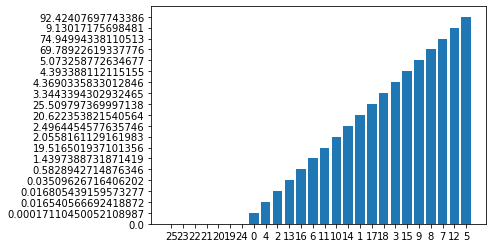

In [35]:
lars_coeff = np.ravel(lars_model.coef_)
lars_coeff_idx = np.arange(len(lars_coeff)). reshape((len(lars_coeff),1))
lars_coeff_sum = np.sum(np.absolute(lars_coeff))
lars_coeff = np.absolute((lars_coeff/pls_coeff_sum)*100).reshape((len(lars_coeff),1))
lars_coeff_colnames=np.array(list(X2.columns)).reshape((len(list(X2.columns))),1)

lars_coeff_X = np.concatenate((lars_coeff_idx, lars_coeff, lars_coeff_colnames), axis=1)
lars_coeff_X = lars_coeff_X[lars_coeff_X[:,1].argsort()]

fig=plt.figure()
plt.bar(lars_coeff_X[:,0],lars_coeff_X[:,1])
plt.show()

In [36]:
lars_coeff_X

array([['25', '0.0', 'SamplingWeight'],
       ['23', '0.0', 'ActualProportion'],
       ['22', '0.0', 'SampleSize'],
       ['21', '0.0', 'AllocProportion'],
       ['20', '0.0', 'Total'],
       ['19', '0.0', 'TRAVEL_INIT_CNTCTS'],
       ['24', '0.0', 'SelectionProb'],
       ['0', '0.00017110450052108987', 'avg_income'],
       ['4', '0.016540566692418872', 'distance'],
       ['2', '0.016805439159573277', 'Contact_Date'],
       ['13', '0.03509626716406202', 'satscore'],
       ['16', '0.5828942714876346', 'SOLICITED_CNTCTS'],
       ['6', '1.4397388731871419', 'init_span'],
       ['11', '19.516501937101356', 'premiere'],
       ['10', '2.0558161129161983', 'mailq'],
       ['14', '2.4964454577635746', 'SELF_INIT_CNTCTS'],
       ['1', '20.622353821540564', 'CAMPUS_VISIT'],
       ['17', '25.509797369997138', 'telecq'],
       ['18', '3.3443394302932465', 'TOTAL_CONTACTS'],
       ['3', '4.3690335833012846', 'Contact_Year'],
       ['15', '4.393388112115155', 'sex'],
       ['9',

# Logistic Regression w/ LARS

In [37]:
#Using only variables that have a coefficient > 0 
X_lars = X2.drop(['SamplingWeight', 'ActualProportion', 'SampleSize', 'AllocProportion', 'Total', 'TRAVEL_INIT_CNTCTS', 'SelectionProb'], axis=1)

logit_model = sm.Logit(Y,X_lars)
result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.256361
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.334     
Dependent Variable: Target_Enroll    AIC:              820.4140  
Date:               2021-09-20 15:34 BIC:              921.6917  
No. Observations:   1526             Log-Likelihood:   -391.21   
Df Model:           18               LL-Null:          -587.00   
Df Residuals:       1507             LLR p-value:      5.2024e-72
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
avg_income        -0.0000   0.0000 -0.1326 0.8945 -0.0000  0.0000
CAMPUS_VISIT       1.1119   0.3036  3.6618 0.0003  0.5167  1.7070


In [41]:
#Checking Accuracy

data2['prob_log_lars'] = result.predict(X_lars)
data2['prediction_logit_lars']= (result.predict(X_lars)>=0.5).astype(int)

print(data2['prediction_logit_lars'].value_counts())
print('Classification Accuracy{}'.format(np.round(accuracy_score(Y,data2['prediction_logit_lars']), decimals=2)))

1    1423
0     103
Name: prediction_logit_lars, dtype: int64
Classification Accuracy0.91


<ipython-input-41-674cb91b9195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['prob_log_lars'] = result.predict(X_lars)
<ipython-input-41-674cb91b9195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['prediction_logit_lars']= (result.predict(X_lars)>=0.5).astype(int)
